### The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of the mean frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness, a measure of asymmetry
- kurt: kurtosis, a measure of peakedness
- sp.ent: spectral entropy (the Shannon or Renyi entropy of a frequency spectrum)
- sfm: spectral flatness measure (the flatness of a frequency spectrum)
- mode: mode frequency
- centroid: centroid frequency (The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located.)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.ensemble import RandomForestRegressor

Using TensorFlow backend.


In [2]:
voices = pd.read_csv('voices.csv')

In [182]:
voices.head(20)

,Mean_freq,Std,Median_freq,First_quartile,Third_quartile,Interquantile_range,Skewness,Kurtosis,Spectral_entropy,Spectral_flatness_measure,...,Centroid_freq,Mean_fundamental_freq,Min_fundamental_freq,Max_fundamental_freq,Mean_dominant_freq,Min_dominant_freq,Max_dominant_freq,Dominant_freq_range,Modulation_index,Gender
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,0.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,0.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,0.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,0.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,0.0
5,0.441173,0.631448,0.432029,0.274076,0.722901,0.534679,0.051782,0.004773,0.922681,0.870197,...,0.441173,0.299699,0.037761,0.857144,0.098448,0.006452,0.124375,0.124464,0.134238,0.0
6,0.526061,0.578887,0.595932,0.375003,0.706098,0.413441,0.040161,0.002997,0.940728,0.900382,...,0.526061,0.276701,0.084682,0.929285,0.159942,0.006452,0.242673,0.242847,0.132985,0.0
7,0.572113,0.602659,0.532916,0.446359,0.819942,0.449670,0.036301,0.002064,0.906544,0.847309,...,0.572113,0.205893,0.041084,0.233218,0.099505,0.006452,0.024303,0.024320,0.304531,0.0
8,0.485814,0.615573,0.509942,0.356014,0.718545,0.445258,0.027701,0.001531,0.953672,0.910746,...,0.485814,0.226085,0.042110,0.834600,0.111416,0.006452,0.098642,0.098712,0.159026,0.0
9,0.448457,0.639632,0.441466,0.304920,0.689783,0.470487,0.030322,0.002079,0.972260,0.952323,...,0.448457,0.276351,0.049021,0.904450,0.112734,0.023656,0.214439,0.214235,0.096442,0.0


In [4]:
voices.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
voices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [6]:
voices.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
old_columns_names = list(voices.columns)

In [8]:
new_columns_names = ['Mean_freq', 'Std', 'Median_freq', 'First_quartile', 'Third_quartile', 'Interquantile_range', 'Skewness',
                     'Kurtosis','Spectral_entropy','Spectral_flatness_measure', 'Mode_freq', 'Centroid_freq',
                     'Mean_fundamental_freq','Min_fundamental_freq','Max_fundamental_freq','Mean_dominant_freq',
                     'Min_dominant_freq', 'Max_dominant_freq','Dominant_freq_range', 'Modulation_index', 'Gender']

In [9]:
voices.rename(columns=dict(zip(old_columns_names, new_columns_names)), inplace=True)

In [10]:
voices.columns

Index(['Mean_freq', 'Std', 'Median_freq', 'First_quartile', 'Third_quartile',
       'Interquantile_range', 'Skewness', 'Kurtosis', 'Spectral_entropy',
       'Spectral_flatness_measure', 'Mode_freq', 'Centroid_freq',
       'Mean_fundamental_freq', 'Min_fundamental_freq', 'Max_fundamental_freq',
       'Mean_dominant_freq', 'Min_dominant_freq', 'Max_dominant_freq',
       'Dominant_freq_range', 'Modulation_index', 'Gender'],
      dtype='object')

In [11]:
voices.head()

,Mean_freq,Std,Median_freq,First_quartile,Third_quartile,Interquantile_range,Skewness,Kurtosis,Spectral_entropy,Spectral_flatness_measure,...,Centroid_freq,Mean_fundamental_freq,Min_fundamental_freq,Max_fundamental_freq,Mean_dominant_freq,Min_dominant_freq,Max_dominant_freq,Dominant_freq_range,Modulation_index,Gender
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [12]:
voices['Gender'].value_counts()

male      1584
female    1584
Name: Gender, dtype: int64

In [13]:
voices.replace({'Gender': {'male': 0, 'female': 1}}, inplace = True)

In [14]:
voices['Gender'].value_counts()

1    1584
0    1584
Name: Gender, dtype: int64

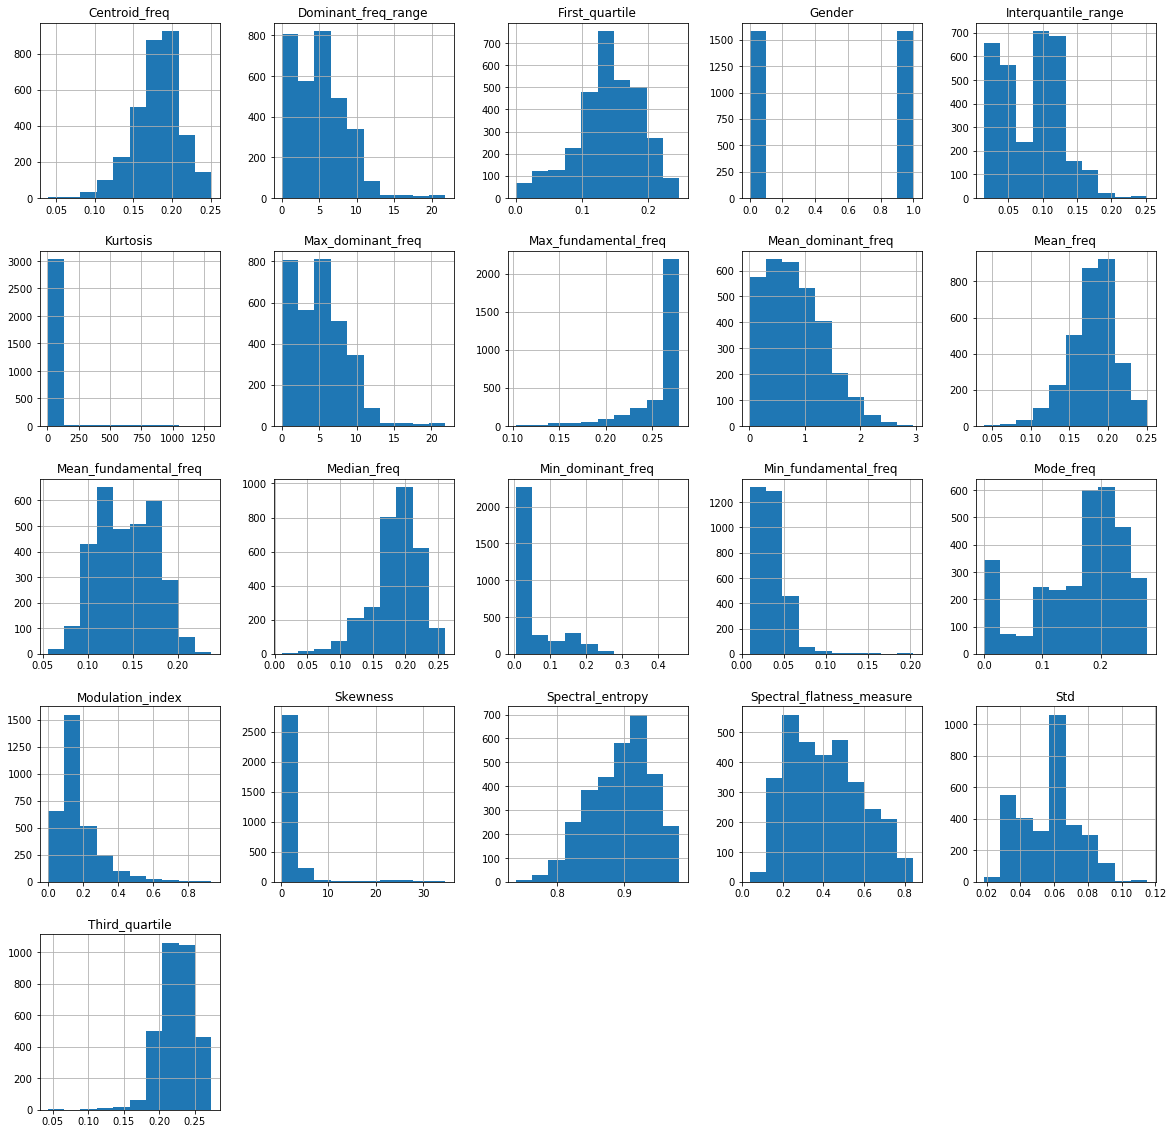

In [15]:
voices.hist(figsize = (20,20))
plt.show()

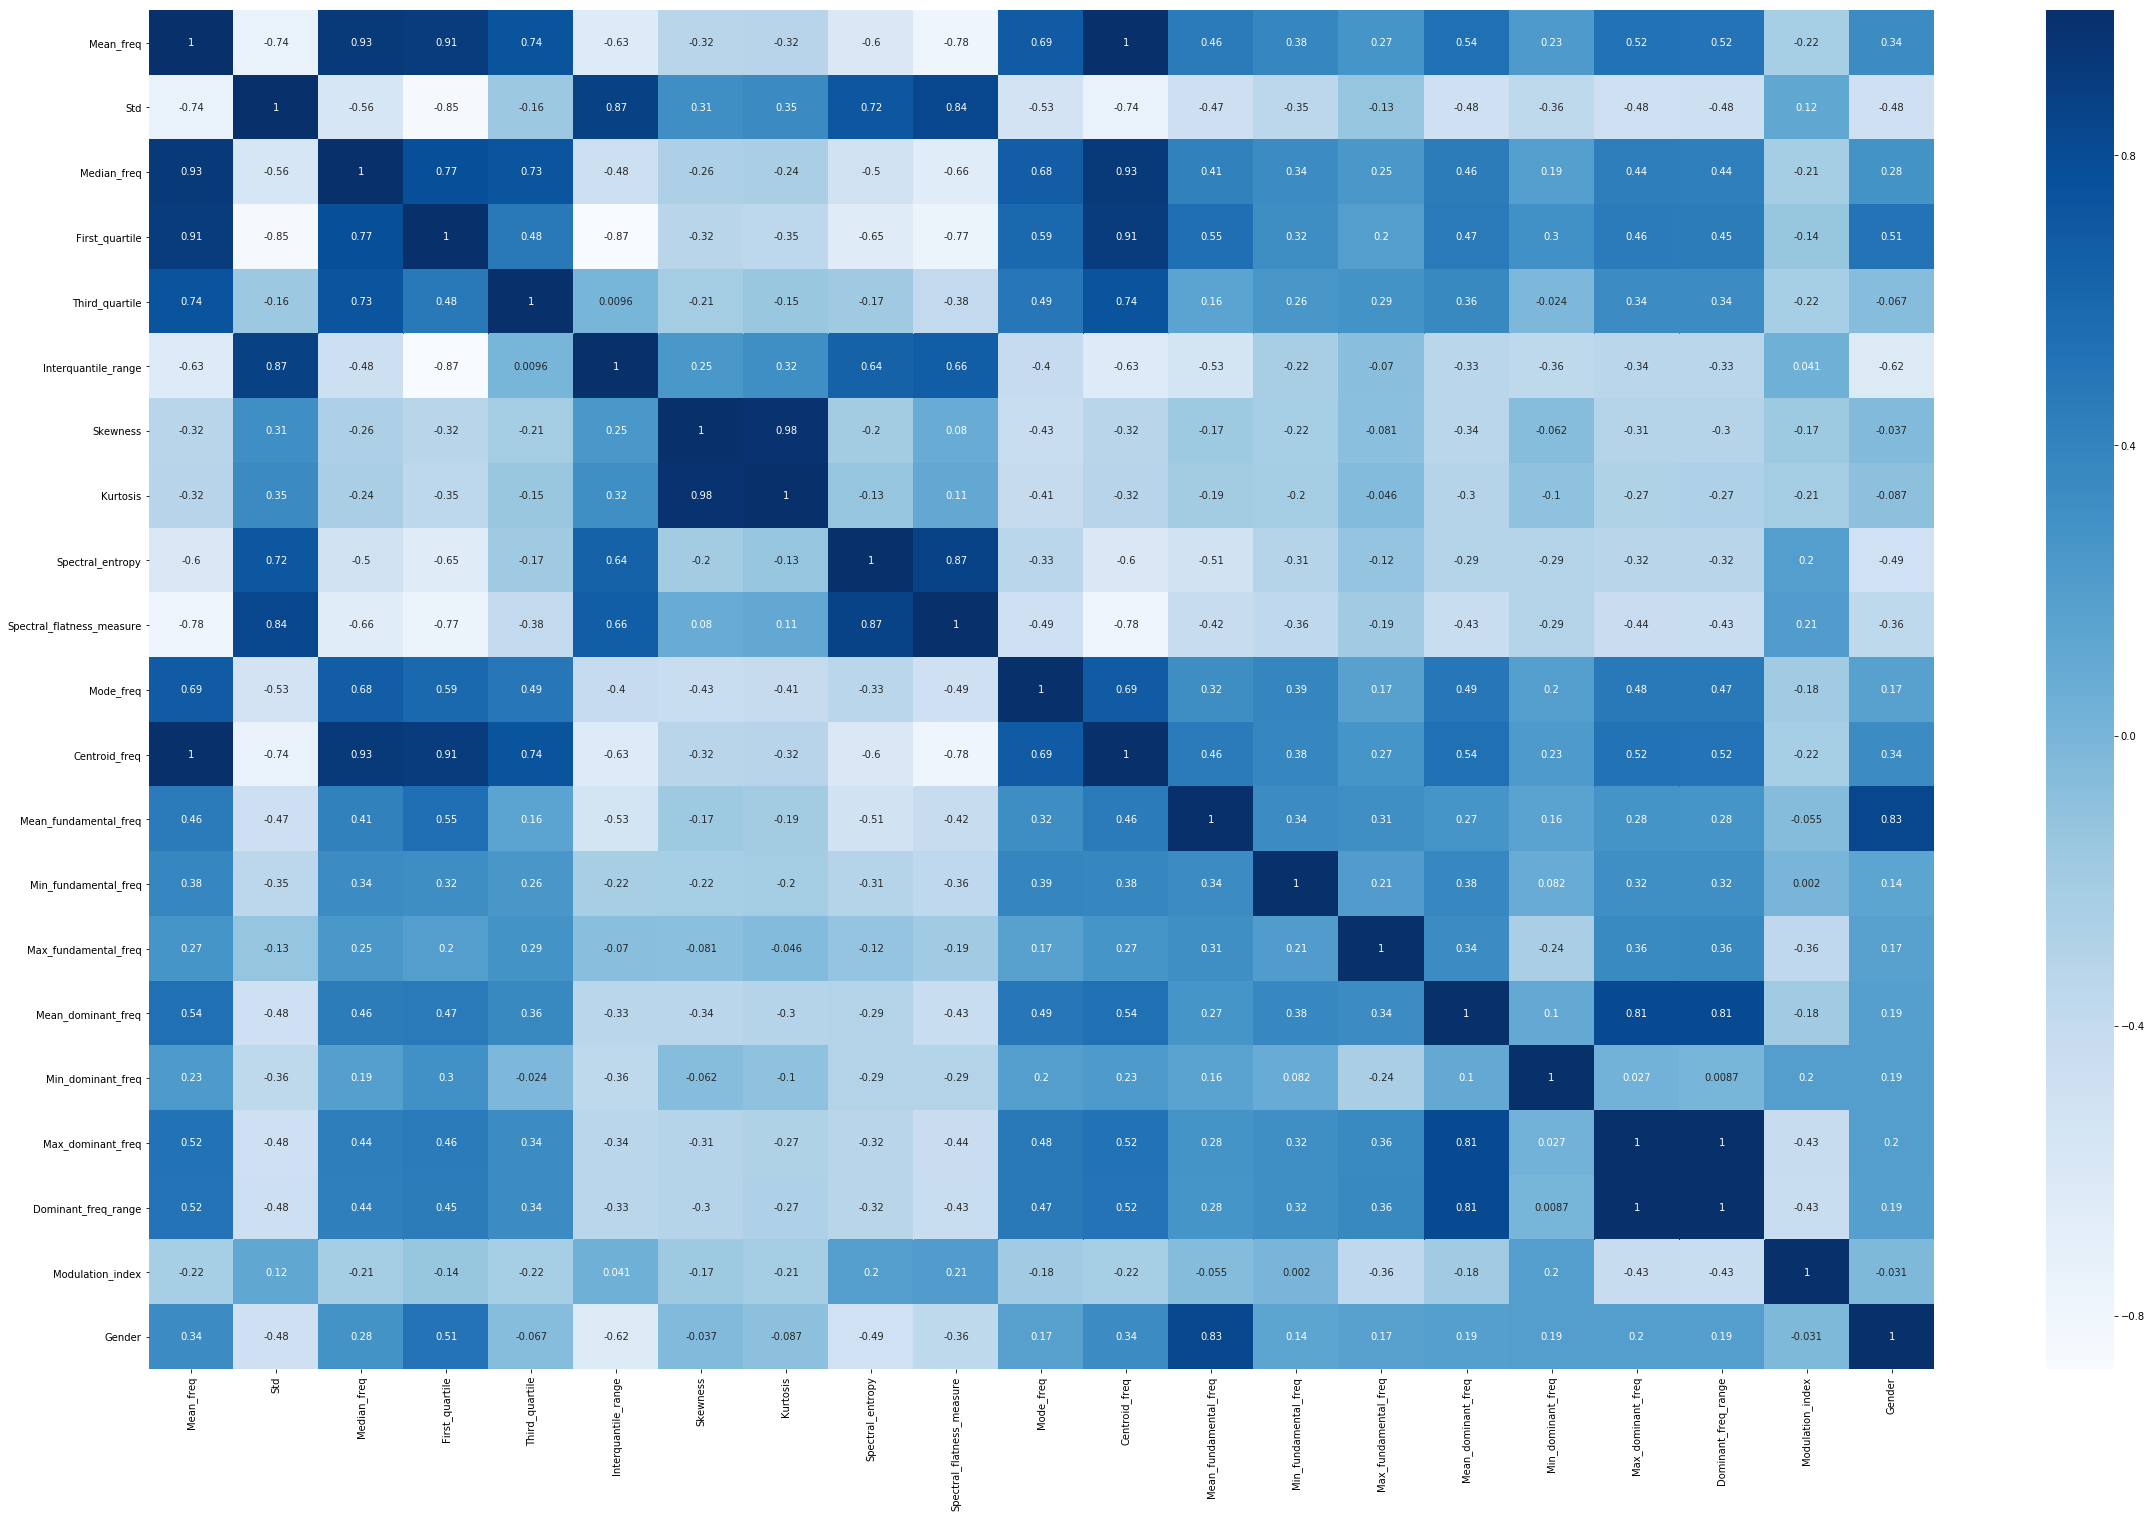

In [16]:
corr_matrix = voices.corr()
f, ax = plt.subplots(figsize=(40, 25))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.savefig("Correlation matrix.jpg")
plt.show()

### From the heatmap above we can see that there are some features that are strongly correlated or have high collinearity:
* Centroid_frequency & Mean_freq
* Median frequency & Mean_freq
* (First_quartile & Mean_freq)
* Skewness & Kurtosis
* max_dominant_freq & Dominant_freq_range

#### We might need to remove some of these features due to high collinearity.

In [17]:
new_columns_names.remove('Gender')

for i in new_columns_names:
    if voices['Gender'].corr(voices[i]) >= 0.4 or voices['Gender'].corr(voices[i]) <= - 0.4:
        print(i)
        print('The correlation is: ' + str(voices['Gender'].corr(voices[i])))

Std
The correlation is: -0.47953884005059316
First_quartile
The correlation is: 0.511455047927791
Interquantile_range
The correlation is: -0.6189155533391112
Spectral_entropy
The correlation is: -0.49055224317109786
Mean_fundamental_freq
The correlation is: 0.8339210712008793


In [18]:
voices_no_collinearity = voices.drop(columns=['Centroid_freq', 'Median_freq','Kurtosis','Max_dominant_freq']).copy()

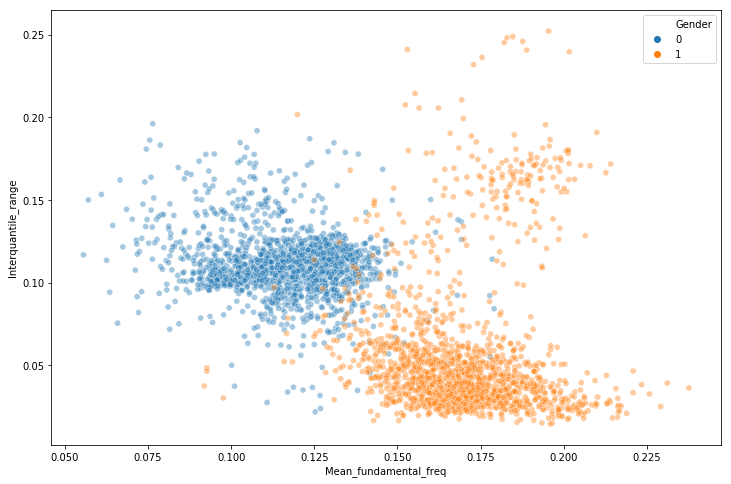

In [19]:
# Plotting the two features that are strongly correlated with the Gender to have an idea about the way they are clustered

plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(x="Mean_fundamental_freq", y="Interquantile_range", hue="Gender", alpha=0.4, data=voices)
#plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'])
plt.show(ax)

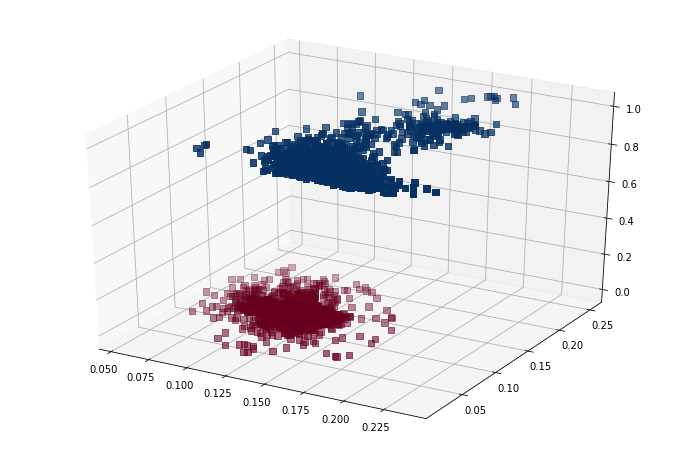

In [20]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
x = np.array(voices["Mean_fundamental_freq"])
y = np.array(voices["Interquantile_range"])
z = np.array(voices["Gender"])

ax.scatter(x,y,z, marker="s", c=voices["Gender"], s=40, cmap="RdBu")

plt.show()

# Data Preprocessing

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

If there are outliers, use RobustScaler(). Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed)

Additional Note: If scaler is used before train_test_split, data leakage will happen. Do use scaler after train_test_split

In [21]:
# voices = pd.DataFrame(columns = list(voices.columns), data = preprocessing.StandardScaler().fit_transform(voices))
# voices_no_collinearity = pd.DataFrame(columns = list(voices_no_collinearity.columns), data = preprocessing.StandardScaler().fit_transform(voices_no_collinearity))


voices = pd.DataFrame(columns = list(voices.columns), data = preprocessing.MinMaxScaler().fit_transform(voices))
voices_no_collinearity = pd.DataFrame(columns = list(voices_no_collinearity.columns), data = preprocessing.MinMaxScaler().fit_transform(voices_no_collinearity))

In [22]:
voices.head()

,Mean_freq,Std,Median_freq,First_quartile,Third_quartile,Interquantile_range,Skewness,Kurtosis,Spectral_entropy,Spectral_flatness_measure,...,Centroid_freq,Mean_fundamental_freq,Min_fundamental_freq,Max_fundamental_freq,Mean_dominant_freq,Min_dominant_freq,Max_dominant_freq,Dominant_freq_range,Modulation_index,Gender
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,0.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,0.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,0.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,0.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,0.0


In [23]:
voices_no_collinearity.head()

,Mean_freq,Std,First_quartile,Third_quartile,Interquantile_range,Skewness,Spectral_entropy,Spectral_flatness_measure,Mode_freq,Mean_fundamental_freq,Min_fundamental_freq,Max_fundamental_freq,Mean_dominant_freq,Min_dominant_freq,Dominant_freq_range,Modulation_index,Gender
0,0.096419,0.473409,0.060063,0.204956,0.254828,0.367853,0.635798,0.564526,0.000000,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.0
1,0.125828,0.505075,0.077635,0.215683,0.246961,0.644279,0.630964,0.591578,0.000000,0.287642,0.031140,0.834600,0.000407,0.006452,0.002146,0.056449,0.0
2,0.179222,0.675536,0.034284,0.385912,0.457148,0.885255,0.442738,0.548382,0.000000,0.236945,0.030264,0.954963,0.000060,0.006452,0.000358,0.049885,0.0
3,0.528261,0.554611,0.389906,0.715802,0.407358,0.031549,0.923261,0.856457,0.299565,0.183442,0.041287,0.834600,0.065659,0.006452,0.025393,0.265043,0.0
4,0.452195,0.627209,0.317627,0.707515,0.474474,0.027742,0.958736,0.926348,0.372362,0.279190,0.036829,0.929285,0.238994,0.006452,0.250715,0.223380,0.0


# Splitting the data

In [24]:
y = pd.DataFrame(voices['Gender'])
X = voices.drop(columns=['Gender']).copy()

In [25]:
y_no_collinearity = pd.DataFrame(voices_no_collinearity['Gender'])
X_no_collinearity = voices_no_collinearity.drop(columns=['Gender']).copy()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train_no_collinearity, X_test_no_collinearity, y_train_no_collinearity, y_test_no_collinearity = train_test_split(X_no_collinearity, y_no_collinearity, test_size=0.2)

# Will start applying supervised learning models

# Applying logistic regression on both data frames

In [28]:
voices_model_1 = LogisticRegression().fit(X_train, y_train)
voices_nc_model_1 = LogisticRegression().fit(X_train_no_collinearity, y_train_no_collinearity)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
y_pred_1 = voices_model_1.predict(X_test)

print('For the full dataframe')
print(confusion_matrix(y_test, y_pred_1))
print(f'Accuracy score = {accuracy_score(y_test, y_pred_1)}')
print(f'Precision score = {precision_score(y_test, y_pred_1)}')
print(f'Recall score = {recall_score(y_test, y_pred_1)}')
print(f'f1 score = {f1_score(y_test, y_pred_1)}')
print(f'ROC AUC score = {roc_auc_score(y_test, y_pred_1)}')

For the full dataframe
[[311   6]
 [  9 308]]
Accuracy score = 0.9763406940063092
Precision score = 0.9808917197452229
Recall score = 0.9716088328075709
f1 score = 0.9762282091917591
ROC AUC score = 0.9763406940063092


In [30]:
y_nc_pred_1 = voices_nc_model_1.predict(X_test_no_collinearity)

print('For the no collinearity dataframe')
print(confusion_matrix(y_test_no_collinearity, y_nc_pred_1))
print(f'Accuracy score = {accuracy_score(y_test_no_collinearity, y_nc_pred_1)}')
print(f'Precision score = {precision_score(y_test_no_collinearity, y_nc_pred_1)}')
print(f'Recall score = {recall_score(y_test_no_collinearity, y_nc_pred_1)}')
print(f'f1 score = {f1_score(y_test_no_collinearity, y_nc_pred_1)}')
print(f'ROC AUC score = {roc_auc_score(y_test_no_collinearity, y_nc_pred_1)}')

For the no collinearity dataframe
[[298  11]
 [ 13 312]]
Accuracy score = 0.9621451104100947
Precision score = 0.9659442724458205
Recall score = 0.96
f1 score = 0.962962962962963
ROC AUC score = 0.9622006472491909


In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_1)
fpr_nc, tpr_nc, thresholds_nc = metrics.roc_curve(y_test_no_collinearity, y_nc_pred_1)

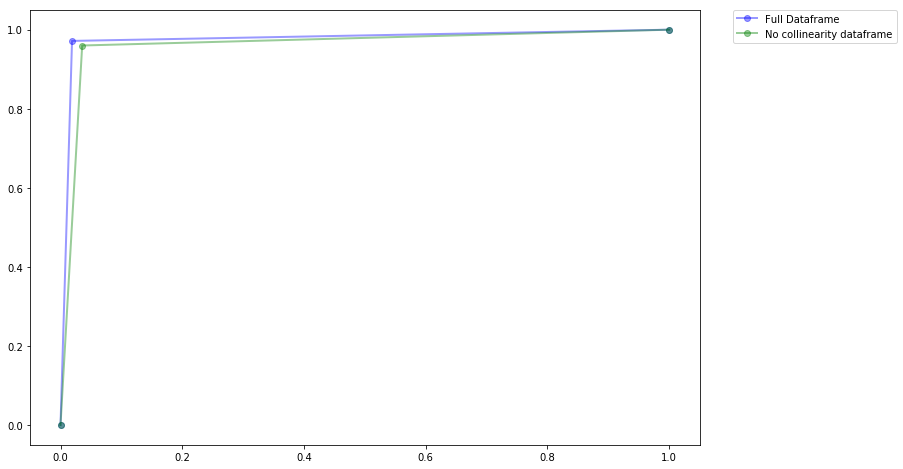

In [32]:
plt.subplots(figsize=(12, 8))
plt.plot(fpr, tpr, marker='o', color='blue', linewidth=2, alpha=0.4,  label='Full Dataframe')
plt.plot(fpr_nc, tpr_nc, marker='o', color='green', linewidth=2, alpha=0.4, label='No collinearity dataframe')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# Applying K nearest neighbors on both data frames

In [33]:
voices_model_2 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
#voices_model_2 = KNeighborsClassifier().fit(X_train, y_train)
voices_nc_model_2 = KNeighborsClassifier(n_neighbors=3).fit(X_train_no_collinearity, y_train_no_collinearity)
#voices_nc_model_2 = KNeighborsClassifier().fit(X_train_no_collinearity, y_train_no_collinearity)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
y_pred_2 = voices_model_2.predict(X_test)

print(confusion_matrix(y_test, y_pred_2))
print(accuracy_score(y_test, y_pred_2))

[[310   7]
 [  6 311]]
0.9794952681388013


In [35]:
y_nc_pred_2 = voices_nc_model_2.predict(X_test_no_collinearity)

print(confusion_matrix(y_test_no_collinearity, y_nc_pred_2))
print(accuracy_score(y_test_no_collinearity, y_nc_pred_2))

[[305   4]
 [  5 320]]
0.9858044164037855


# Applying linear regression on both data frames with 80% split

In [36]:
voices_model_3 = linear_model.LinearRegression().fit(X_train, y_train)
voices_nc_model_3 = linear_model.LinearRegression().fit(X_train_no_collinearity, y_train_no_collinearity)

In [37]:
print(voices_model_3.intercept_)
print('\n####################################################\n')
print(voices_model_3.coef_)

[-3.02113876e+11]

####################################################

[[ 1.00421392e+10 -3.75410557e-01  2.81274080e-01  2.65116914e+12
  -2.47313154e+12  2.54977866e+12  9.79427427e-01 -5.12719452e-01
   4.98330593e-02  4.13575530e-01 -1.34131312e-01 -1.00421392e+10
   2.23268849e+00 -5.14318943e-01 -1.22985750e-01  2.05183864e-01
   9.28283022e+08 -4.46853487e+10  4.46534078e+10 -4.08169627e-02]]


In [38]:
y_pred_3 = voices_model_3.predict(X_test)
r2_score(y_test, y_pred_3)

0.807421308351616

In [39]:
y_nc_pred_3 = voices_nc_model_3.predict(X_test_no_collinearity)
r2_score(y_test_no_collinearity, y_nc_pred_3)

0.7861122614654226

# Applying linear regression on both data frames with 90% split

In [40]:
X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.1)
X_train_no_collinearity09, X_test_no_collinearity09, y_train_no_collinearity09, y_test_no_collinearity09 = train_test_split(X_no_collinearity, y_no_collinearity, test_size=0.1)

In [41]:
voices_model_4 = linear_model.LinearRegression().fit(X_train09, y_train09)
voices_nc_model_4 = linear_model.LinearRegression().fit(X_train_no_collinearity09, y_train_no_collinearity09)

In [42]:
print(voices_model_4.intercept_)
print('\n####################################################\n')
print(voices_model_4.coef_)

[-3.59273257e+11]

####################################################

[[ 3.26304308e+10 -3.65068436e-01  2.93414116e-01  3.15283595e+12
  -2.94110922e+12  3.03225987e+12  1.26629806e+00 -7.90199101e-01
   1.67127848e-01  3.02906036e-01 -1.43120766e-01 -3.26304308e+10
   2.27113771e+00 -5.78528166e-01 -1.32179618e-01  2.00848818e-01
  -1.42353996e+08  6.85258459e+09 -6.84768639e+09 -3.31945419e-02]]


In [43]:
y_pred_4 = voices_model_4.predict(X_test09)
r2_score(y_test09, y_pred_4)

0.7432291490329521

In [44]:
y_nc_pred_4 = voices_nc_model_4.predict(X_test_no_collinearity09)
r2_score(y_test_no_collinearity09, y_nc_pred_4)

0.7625561062553664

# Applying linear regression Recursive Feature Elimination (RFE)

In [45]:
voices_model_rfe = linear_model.LinearRegression()

rfe = RFE(voices_model_rfe, n_features_to_select=5)

In [46]:
selector1 = rfe.fit(X_train, y_train)
selector2 = rfe.fit(X_train_no_collinearity, y_train_no_collinearity)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
X_train.head()

,Mean_freq,Std,Median_freq,First_quartile,Third_quartile,Interquantile_range,Skewness,Kurtosis,Spectral_entropy,Spectral_flatness_measure,Mode_freq,Centroid_freq,Mean_fundamental_freq,Min_fundamental_freq,Max_fundamental_freq,Mean_dominant_freq,Min_dominant_freq,Max_dominant_freq,Dominant_freq_range,Modulation_index
2475,0.823612,0.234255,0.836058,0.822827,0.837631,0.075389,0.080080,0.008180,0.439728,0.301544,0.793494,0.823612,0.703785,0.205155,0.999749,0.437519,0.040860,0.317012,0.316524,0.139305
977,0.717745,0.416733,0.738811,0.542348,0.864783,0.393357,0.041857,0.002799,0.699174,0.401187,0.840722,0.717745,0.414098,0.195251,0.990585,0.396557,0.040860,0.240886,0.240343,0.095528
1834,0.676945,0.195601,0.666430,0.681284,0.681747,0.071363,0.085273,0.008782,0.439341,0.315786,0.604712,0.676945,0.613464,0.085126,0.857144,0.074016,0.333333,0.027162,0.020386,0.128578
2521,0.787013,0.164684,0.764749,0.778252,0.781661,0.067449,0.109834,0.016408,0.440594,0.219616,0.707283,0.787013,0.640672,0.191881,0.972570,0.437924,0.144086,0.352395,0.349785,0.118663
2335,0.867339,0.180256,0.866863,0.862552,0.867538,0.063093,0.063745,0.004817,0.435321,0.226631,0.812165,0.867339,0.672101,0.209180,0.972570,0.236878,0.040860,0.333095,0.332618,0.085936


In [48]:
print(selector1.support_)
print(selector1.ranking_)

[False False  True  True  True False False False False  True  True False
 False False False False]
[ 3  5  1  1  1  2  9  4  7  1  1  8  6 11 10 12]


In [49]:
X_train_no_collinearity.head()

,Mean_freq,Std,First_quartile,Third_quartile,Interquantile_range,Skewness,Spectral_entropy,Spectral_flatness_measure,Mode_freq,Mean_fundamental_freq,Min_fundamental_freq,Max_fundamental_freq,Mean_dominant_freq,Min_dominant_freq,Dominant_freq_range,Modulation_index
665,0.595037,0.288073,0.514376,0.676216,0.239543,0.068239,0.629429,0.218515,0.692154,0.331776,0.107138,0.771005,0.186824,0.006452,0.161660,0.219489
2128,0.724483,0.161546,0.715339,0.714491,0.067713,0.075517,0.450100,0.264696,0.711045,0.616340,0.032450,0.791561,0.320459,0.298925,0.309728,0.135243
1950,0.750091,0.135435,0.735692,0.760545,0.091220,0.072335,0.509691,0.170868,0.653875,0.716757,0.341807,0.771005,0.239449,0.367742,0.274678,0.121777
2307,0.832405,0.213147,0.807283,0.853369,0.106817,0.055825,0.506763,0.272133,0.747922,0.695226,0.196972,0.990585,0.475866,0.040860,0.460300,0.105784
2074,0.508382,0.638515,0.362967,0.714729,0.434328,0.225632,0.945670,0.919626,0.430101,0.519362,0.038713,0.981526,0.126302,0.006452,0.035765,0.242144


In [50]:
print(selector2.support_)
print(selector2.ranking_)

[False False  True  True  True False False False False  True  True False
 False False False False]
[ 3  5  1  1  1  2  9  4  7  1  1  8  6 11 10 12]


# Creating new reduced dataframes after using RFE and splitting them

In [51]:
y_reduced = y.copy()
#X_reduced = X[['Median_freq', 'First_quartile', 'Third_quartile']].copy()
X_reduced = X[['Median_freq', 'First_quartile', 'Third_quartile', 'Spectral_flatness_measure', 'Mode_freq']].copy()

In [52]:
y_nc_reduced = y_no_collinearity.copy()
#X_nc_reduced = X_no_collinearity[['First_quartile', 'Third_quartile','Interquantile_range']].copy()
X_nc_reduced = X_no_collinearity[['First_quartile', 'Third_quartile','Interquantile_range', 'Mean_fundamental_freq', 'Min_fundamental_freq']].copy()

In [53]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2)
X_train_reduced_nc, X_test_reduced_nc, y_train_reduced_nc, y_test_reduced_nc = train_test_split(X_nc_reduced, y_nc_reduced, test_size=0.2)

# Applying linear regression on the reduced data frames

In [54]:
voices_model_5 = linear_model.LinearRegression().fit(X_train_reduced, y_train_reduced)
voices_nc_model_5 = linear_model.LinearRegression().fit(X_train_reduced_nc, y_train_reduced_nc)

In [55]:
y_pred_5 = voices_model_5.predict(X_test_reduced)
y_nc_pred_5 = voices_nc_model_5.predict(X_test_reduced_nc)

In [56]:
r2_score(y_test_reduced, y_pred_5)

0.3862445100955628

In [57]:
r2_score(y_test_reduced_nc, y_nc_pred_5)

0.7835599878585024

# Will start applying Deep learning models

# Building Neural Network

In [58]:
X.shape

(3168, 20)

In [59]:
X_no_collinearity.shape

(3168, 16)

In [60]:
# Build neural network
voices_model = models.Sequential()
voices_model.add(Dense(units=720, kernel_initializer='uniform', activation='relu', input_dim=20))
voices_model.add(Dense(units=360, kernel_initializer='uniform', activation='relu'))
voices_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
voices_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
voices_model.fit(X_train, y_train, batch_size=2, epochs=15)

print('\n######################################################################################\n')
val_loss, val_acc = voices_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {val_loss}')
print(f'Test accuracy: {val_acc}')

voices_model.save('voices.model')

Epoch 1/15
2534/2534 [==============================] - 6s 3ms/step - loss: 0.2273 - accuracy: 0.9041
Epoch 2/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.1210 - accuracy: 0.9586
Epoch 3/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.1242 - accuracy: 0.9542
Epoch 4/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.1112 - accuracy: 0.9629
Epoch 5/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.0988 - accuracy: 0.9637
Epoch 6/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.0993 - accuracy: 0.9653
Epoch 7/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.0955 - accuracy: 0.9672
Epoch 8/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.0838 - accuracy: 0.9712
Epoch 9/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.0924 - accuracy: 0.9684
Epoch 10/15
2534/2534 [==============================] - 6s 2ms/step - loss: 0.094

In [61]:
# new_model = models.load_model('voices.model')

In [62]:
# y_pred_6 = new_model.predict(X_test[30:50])

# for i, j in zip(y_test[30:50].values, y_pred_6):
#     print(f"The actual is : {i} and the predicted is {j}")

In [63]:
# Build neural network
voices_model_nc = models.Sequential()
voices_model_nc.add(Dense(units=512, kernel_initializer='uniform', activation='relu', input_dim=16))
voices_model_nc.add(Dense(units=256, kernel_initializer='uniform', activation='relu'))
voices_model_nc.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
voices_model_nc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
voices_model_nc.fit(X_train_no_collinearity, y_train_no_collinearity, batch_size=2, epochs=15)

print('\n######################################################################################\n')
val_loss, val_acc = voices_model_nc.evaluate(X_test_no_collinearity, y_test_no_collinearity, verbose=0)
print(f'Test loss: {val_loss}')
print(f'Test accuracy: {val_acc}')

voices_model_nc.save('voices_nc.model')

Epoch 1/15
2534/2534 [==============================] - 4s 2ms/step - loss: 0.1873 - accuracy: 0.9246
Epoch 2/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.1125 - accuracy: 0.9601
Epoch 3/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.1067 - accuracy: 0.9617
Epoch 4/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.0946 - accuracy: 0.9724
Epoch 5/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.0911 - accuracy: 0.9704
Epoch 6/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.0864 - accuracy: 0.9704
Epoch 7/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.0851 - accuracy: 0.9740
Epoch 8/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.0837 - accuracy: 0.9704
Epoch 9/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.0855 - accuracy: 0.9708
Epoch 10/15
2534/2534 [==============================] - 4s 1ms/step - loss: 0.079

In [64]:
# new_model_nc = models.load_model('voices_nc.model')

In [65]:
# y_nc_pred_5 = new_model_nc.predict(X_test_no_collinearity[50:70])

# for i, j in zip(y_test_no_collinearity[50:70].values, y_nc_pred_5):
#     print(f"The actual is : {i} and the predicted is {j}")

# Creating a new daraframe with the top 3 features (Highly correlated with Gender) only, and Building Neural Network for it to see the accuracy and the loss.

In [66]:
voices_top3_features = voices[['First_quartile', 'Interquantile_range', 'Mean_fundamental_freq', 'Gender']].copy()
voices_top3_features = pd.DataFrame(columns = list(voices_top3_features.columns), data = preprocessing.MinMaxScaler().fit_transform(voices_top3_features))

y_top3_features = pd.DataFrame(voices_top3_features['Gender'])
X_top3_features = voices_top3_features.drop(columns=['Gender']).copy()

X_train_top3_features, X_test_top3_features, y_train_top3_features, y_test_top3_features = train_test_split(X_top3_features, y_top3_features, test_size=0.2)

In [67]:
# Build neural network
voices_model_top3 = models.Sequential()
voices_model_top3.add(Dense(units=180, kernel_initializer='uniform', activation='relu', input_dim=3))
voices_model_top3.add(Dense(units=90, kernel_initializer='uniform', activation='relu'))
voices_model_top3.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
voices_model_top3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
voices_model_top3.fit(X_train_top3_features, y_train_top3_features, batch_size=5, epochs=50)

print('\n######################################################################################\n')
val_loss, val_acc = voices_model_top3.evaluate(X_test_top3_features, y_test_top3_features, verbose=0)
print(f'Test loss: {val_loss}')
print(f'Test accuracy: {val_acc}')

voices_model_top3.save('voices_top3.model')

Epoch 1/50
2534/2534 [==============================] - 1s 340us/step - loss: 0.2615 - accuracy: 0.8899
Epoch 2/50
2534/2534 [==============================] - 1s 295us/step - loss: 0.1018 - accuracy: 0.9692
Epoch 3/50
2534/2534 [==============================] - 1s 299us/step - loss: 0.1042 - accuracy: 0.9649
Epoch 4/50
2534/2534 [==============================] - 1s 295us/step - loss: 0.0971 - accuracy: 0.9676
Epoch 5/50
2534/2534 [==============================] - 1s 296us/step - loss: 0.0984 - accuracy: 0.9637
Epoch 6/50
2534/2534 [==============================] - 1s 296us/step - loss: 0.0945 - accuracy: 0.9696
Epoch 7/50
2534/2534 [==============================] - 1s 297us/step - loss: 0.0965 - accuracy: 0.9641
Epoch 8/50
2534/2534 [==============================] - 1s 296us/step - loss: 0.0931 - accuracy: 0.9712
Epoch 9/50
2534/2534 [==============================] - 1s 298us/step - loss: 0.0928 - accuracy: 0.9676
Epoch 10/50
2534/2534 [==============================] - 1s 293u

In [68]:
# new_model_top3 = models.load_model('voices_top3.model')

In [69]:
# y_top3_pred = new_model_top3.predict(X_test_top3_features[70:90])

# for i, j in zip(y_test_top3_features[70:90].values, y_top3_pred):
#     print(f"The actual is : {i} and the predicted is {j}")

# Building a Random Forest Regressor, and applying it on the three dataframes:
### - Full Dataframe
### - No collinearity Dataframe
### - Only top 3 features Dataframe

In [70]:
voices_full_rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
voices_nc_rfr = RandomForestRegressor(max_depth=10).fit(X_train_no_collinearity, y_train_no_collinearity)
voices_top3_rfr = RandomForestRegressor(max_depth=10).fit(X_train_top3_features, y_train_top3_features)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
voices_full_rfr_y_pred_train = voices_full_rfr.predict(X_train)
voices_full_rfr_y_pred_test = voices_full_rfr.predict(X_test)

voices_nc_rfr_y_pred_train = voices_nc_rfr.predict(X_train_no_collinearity)
voices_nc_rfr_y_pred_test = voices_nc_rfr.predict(X_test_no_collinearity)

voices_top3_rfr_y_pred_train = voices_top3_rfr.predict(X_train_top3_features)
voices_top3_rfr_y_pred_test = voices_top3_rfr.predict(X_test_top3_features)

In [72]:
print("For the full dataframe")
print(f'the r2_score for the training set = {r2_score(y_train, voices_full_rfr_y_pred_train)}')
print(f'the r2_score for the test set = {r2_score(y_test, voices_full_rfr_y_pred_test)}')
print('\n###############################################################\n')
print("For the no collinearity dataframe")
print(f'the r2_score for the training set = {r2_score(y_train_no_collinearity, voices_nc_rfr_y_pred_train)}')
print(f'the r2_score for the test set = {r2_score(y_test_no_collinearity, voices_nc_rfr_y_pred_test)}')
print('\n###############################################################\n')
print("For the top 3 features dataframe")
print(f'the r2_score for the training set = {r2_score(y_train_top3_features, voices_top3_rfr_y_pred_train)}')
print(f'the r2_score for the test set = {r2_score(y_test_top3_features, voices_top3_rfr_y_pred_test)}')

For the full dataframe
the r2_score for the training set = 0.9886004527821306
the r2_score for the test set = 0.9366786636493032

###############################################################

For the no collinearity dataframe
the r2_score for the training set = 0.9873320411958659
the r2_score for the test set = 0.9141147629559755

###############################################################

For the top 3 features dataframe
the r2_score for the training set = 0.9868659343789353
the r2_score for the test set = 0.875472052690149


# Applying K nearest neighbors on the top 3 features dataframe

In [73]:
voices_top3_knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_top3_features, y_train_top3_features)
voices_top3_knn_y_pred = voices_top3_knn_model.predict(X_test_top3_features)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [74]:
print(confusion_matrix(y_test_top3_features, voices_top3_knn_y_pred))
print(accuracy_score(y_test_top3_features, voices_top3_knn_y_pred))

[[314   8]
 [ 14 298]]
0.9652996845425867


# Applying logistic regression on the top 3 features dataframe

In [75]:
voices_top3_lr_model = LogisticRegression().fit(X_train_top3_features, y_train_top3_features)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
voices_top3_lr_y_pred = voices_top3_lr_model.predict(X_test_top3_features)

print('For the top 3 features dataframe')
print(confusion_matrix(y_test_top3_features, voices_top3_lr_y_pred))
print(f'Accuracy score = {accuracy_score(y_test_top3_features, voices_top3_lr_y_pred)}')
print(f'Precision score = {precision_score(y_test_top3_features, voices_top3_lr_y_pred)}')
print(f'Recall score = {recall_score(y_test_top3_features, voices_top3_lr_y_pred)}')
print(f'f1 score = {f1_score(y_test_top3_features, voices_top3_lr_y_pred)}')
print(f'ROC AUC score = {roc_auc_score(y_test_top3_features, voices_top3_lr_y_pred)}')

For the top 3 features dataframe
[[314   8]
 [ 19 293]]
Accuracy score = 0.9574132492113565
Precision score = 0.973421926910299
Recall score = 0.9391025641025641
f1 score = 0.9559543230016313
ROC AUC score = 0.9571289218028348


In [77]:
fpr_top3, tpr_top3, thresholds_top3 = metrics.roc_curve(y_test_top3_features, voices_top3_lr_y_pred)

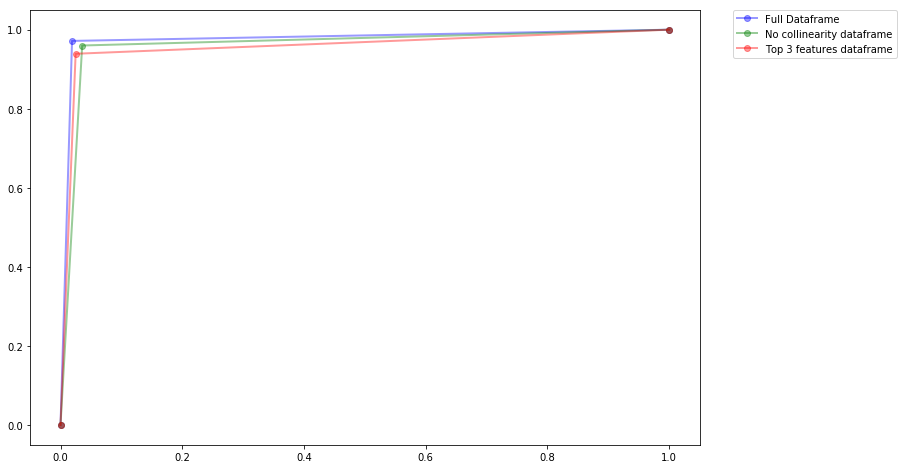

In [78]:
plt.subplots(figsize=(12, 8))
plt.plot(fpr, tpr, marker='o', color='blue', linewidth=2, alpha=0.4, label='Full Dataframe')
plt.plot(fpr_nc, tpr_nc, marker='o', color='green', linewidth=2, alpha=0.4, label='No collinearity dataframe')
plt.plot(fpr_top3, tpr_top3, marker='o', color='red', linewidth=2, alpha=0.4, label='Top 3 features dataframe')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# Creating a dataframe with only the features that I was able to extract from the audio files.

In [213]:
voices_new = voices[['First_quartile', 'Interquantile_range', 'Kurtosis',
       'Mean_freq', 'Median_freq', 'Mode_freq', 'Skewness', 'Std', 'Third_quartile', 'Gender']].copy()


# voices_new = voices[['Centroid_freq', 'First_quartile', 'Interquantile_range', 'Kurtosis',
#        'Mean_freq', 'Median_freq', 'Mode_freq', 'Skewness',
#        'Spectral_flatness_measure', 'Std', 'Third_quartile','Mean_fundamental_freq','Max_fundamental_freq', 'Gender']].copy()


# voices_new = voices[['Centroid_freq', 'First_quartile', 'Interquantile_range', 'Kurtosis',
#        'Mean_freq', 'Median_freq', 'Mode_freq', 'Skewness',
#        'Spectral_flatness_measure', 'Std', 'Third_quartile','Mean_fundamental_freq','Max_fundamental_freq','Mean_dominant_freq',
#         'Max_dominant_freq','Min_dominant_freq', 'Gender']].copy()

In [214]:
voices_new_columns = list(voices_new.columns)
voices_new_columns.remove('Gender')

for i in voices_new_columns:
    if voices_new['Gender'].corr(voices_new[i]) >= 0.4 or voices_new['Gender'].corr(voices_new[i]) <= - 0.4:
        print(i)
        print('The correlation is: ' + str(voices_new['Gender'].corr(voices_new[i])))

First_quartile
The correlation is: 0.5114550479277908
Interquantile_range
The correlation is: -0.6189155533391112
Std
The correlation is: -0.47953884005059294


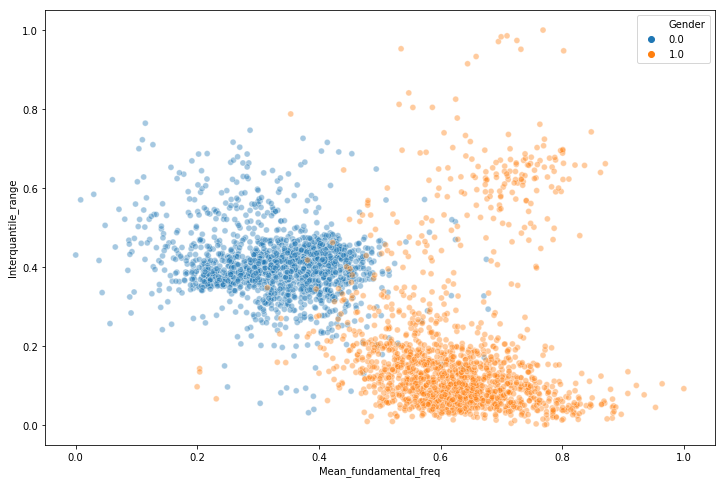

In [185]:
plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(x="Mean_fundamental_freq", y="Interquantile_range", hue="Gender", alpha=0.4, data=voices_new)
plt.show(ax)

In [215]:
y_new = pd.DataFrame(voices_new['Gender'])
X_new = voices_new.drop(columns=['Gender']).copy()

In [216]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2)

In [217]:
voices_new_knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_new_train, y_new_train)
voices_new_knn_y_pred = voices_new_knn_model.predict(X_new_test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [218]:
print(confusion_matrix(y_new_test, voices_new_knn_y_pred))
print(accuracy_score(y_new_test, voices_new_knn_y_pred))

[[304  15]
 [ 22 293]]
0.9416403785488959


In [219]:
voices_new_lr_model = LogisticRegression().fit(X_new_train, y_new_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [220]:
voices_new_lr_y_pred = voices_new_lr_model.predict(X_new_test)

print('For the new voices (With the features that I was able to extract) dataframe')
print(confusion_matrix(y_new_test, voices_new_lr_y_pred))
print(f'Accuracy score = {accuracy_score(y_new_test, voices_new_lr_y_pred)}')
print(f'Precision score = {precision_score(y_new_test, voices_new_lr_y_pred)}')
print(f'Recall score = {recall_score(y_new_test, voices_new_lr_y_pred)}')
print(f'f1 score = {f1_score(y_new_test, voices_new_lr_y_pred)}')
print(f'ROC AUC score = {roc_auc_score(y_new_test, voices_new_lr_y_pred)}')

For the new voices (With the features that I was able to extract) dataframe
[[302  17]
 [ 59 256]]
Accuracy score = 0.8801261829652997
Precision score = 0.9377289377289377
Recall score = 0.8126984126984127
f1 score = 0.8707482993197279
ROC AUC score = 0.879703438324128


In [221]:
X_new.shape

(3168, 9)

In [222]:
voices_new_model = models.Sequential()
voices_new_model.add(Dense(units=180, kernel_initializer='uniform', activation='relu', input_dim=9))
voices_new_model.add(Dense(units=90, kernel_initializer='uniform', activation='relu'))
voices_new_model.add(Dense(units=45, kernel_initializer='uniform', activation='relu'))
voices_new_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
voices_new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
voices_new_model.fit(X_new_train, y_new_train, batch_size=5, epochs=50)

print('\n######################################################################################\n')
val_loss, val_acc = voices_new_model.evaluate(X_new_test, y_new_test, verbose=0)
print(f'Test loss: {val_loss}')
print(f'Test accuracy: {val_acc}')

voices_new_model.save('voices_new.model')

Epoch 1/50
2534/2534 [==============================] - 1s 422us/step - loss: 0.4086 - accuracy: 0.8425
Epoch 2/50
2534/2534 [==============================] - 1s 350us/step - loss: 0.2711 - accuracy: 0.8931
Epoch 3/50
2534/2534 [==============================] - 1s 400us/step - loss: 0.2426 - accuracy: 0.8986
Epoch 4/50
2534/2534 [==============================] - 1s 341us/step - loss: 0.2158 - accuracy: 0.9191
Epoch 5/50
2534/2534 [==============================] - 1s 354us/step - loss: 0.2179 - accuracy: 0.9167
Epoch 6/50
2534/2534 [==============================] - 1s 363us/step - loss: 0.2167 - accuracy: 0.9155
Epoch 7/50
2534/2534 [==============================] - 1s 394us/step - loss: 0.2099 - accuracy: 0.9199
Epoch 8/50
2534/2534 [==============================] - 1s 355us/step - loss: 0.2090 - accuracy: 0.9191
Epoch 9/50
2534/2534 [==============================] - 1s 333us/step - loss: 0.1988 - accuracy: 0.9234
Epoch 10/50
2534/2534 [==============================] - 1s 373u

In [223]:
voices_to_test = pd.read_csv('voices_to_test.csv')

In [224]:
voices_to_test = pd.DataFrame(columns = list(voices_to_test.columns), data = preprocessing.MinMaxScaler().fit_transform(voices_to_test))

In [225]:
voices_to_test

,First_quartile,Interquantile_range,Kurtosis,Mean_freq,Median_freq,Mode_freq,Skewness,Std,Third_quartile,Gender
0,0.950245,0.921814,0.971675,1.000000,1.000000,0.175406,0.684215,0.973533,0.942434,0.0
1,0.625581,0.782260,1.000000,0.693110,0.254758,0.964570,1.000000,0.889857,0.787738,0.0
2,0.667972,0.645946,0.000000,0.576938,0.139840,0.943544,0.064300,0.818025,0.653932,0.0
3,1.000000,0.692818,0.372810,0.664723,0.253520,0.126901,0.248743,0.838227,0.716619,0.0
4,0.658343,0.121539,0.413467,0.191813,0.080204,0.700953,0.427064,0.296262,0.130865,0.0
5,0.493065,0.318611,0.924084,0.385515,0.140020,0.010903,0.819581,0.618266,0.319306,1.0
6,0.000000,0.563693,0.497393,0.460895,0.000000,0.000000,0.644446,0.808691,0.539822,1.0
7,0.527291,1.000000,0.067007,0.989644,0.872022,0.711191,0.000000,1.000000,1.000000,1.0
8,0.455839,0.000000,0.055856,0.000000,0.023166,0.976167,0.003270,0.000000,0.000000,1.0
9,0.932775,0.377834,0.060335,0.478919,0.122535,1.000000,0.013147,0.717185,0.399483,1.0


In [226]:
y_to_test = pd.DataFrame(voices_to_test['Gender'])
X_to_test = voices_to_test.drop(columns=['Gender']).copy()

In [227]:
to_test = models.load_model('voices_new.model')

In [228]:
y_pred_to_test = to_test.predict(X_to_test)

for i, j in zip(y_to_test.values, y_pred_to_test):
    print(f"The actual is : {i} and the predicted is {j}")

The actual is : [0.] and the predicted is [0.00098532]
The actual is : [0.] and the predicted is [0.01719618]
The actual is : [0.] and the predicted is [0.00596887]
The actual is : [0.] and the predicted is [0.00247368]
The actual is : [0.] and the predicted is [0.9978902]
The actual is : [1.] and the predicted is [0.]
The actual is : [1.] and the predicted is [0.0008364]
The actual is : [1.] and the predicted is [0.97265744]
The actual is : [1.] and the predicted is [0.9837715]
The actual is : [1.] and the predicted is [0.93090075]


In [229]:
y_pred_to_test = voices_new_knn_model.predict(X_to_test)


print(confusion_matrix(y_to_test, y_pred_to_test))
print(accuracy_score(y_to_test, y_pred_to_test))

[[4 1]
 [3 2]]
0.6


In [230]:
y_pred_to_test = voices_new_lr_model.predict(X_to_test)

print('For the new voices (With the features that I was able to extract) dataframe')
print(confusion_matrix(y_to_test, y_pred_to_test))
print(f'Accuracy score = {accuracy_score(y_to_test, y_pred_to_test)}')
print(f'Precision score = {precision_score(y_to_test, y_pred_to_test)}')
print(f'Recall score = {recall_score(y_to_test, y_pred_to_test)}')
print(f'f1 score = {f1_score(y_to_test, y_pred_to_test)}')
print(f'ROC AUC score = {roc_auc_score(y_to_test, y_pred_to_test)}')

For the new voices (With the features that I was able to extract) dataframe
[[4 1]
 [2 3]]
Accuracy score = 0.7
Precision score = 0.75
Recall score = 0.6
f1 score = 0.6666666666666665
ROC AUC score = 0.7000000000000002
